# Sumário

[Introdução](#Introdução)

[Função de Custo](#Função-de-Custo)

[Regressão Logística](#Regressão-Log%C3%ADstica)

[Exercícios](#Exercícios)

[Referências](#Referências)

# Imports e Configurações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Introdução

A __Regressão Logística__, apesar do nome, é uma técnica utilizada para fazer __classificação binária__. Nesse caso, ao invés de prever um valor contínuo, a nossa __saída é composta de apenas dois valores: 0 ou 1__, em geral. Para fazer a regressão logística, utilizamos como função de ativação a função conhecida como __sigmoid__. Tal função, é descrita pela seguinte fórmula:

$$\widehat{y} = \frac{1}{1+e^{-z}} = \frac{e^z}{1+e^z}$$

No caso de redes neurais, em geral consideramos $z(w,b) = w^T x + b$.

# Função de Custo

A função de custo da regressão logística é chamada de __entropia cruzada__ (do inglês, __cross-entropy__) e é definida pela seguinte fórmula:

$$J(z) = -\frac{1}{N}\sum_{i}^N \left[ y_i\log(\widehat{y}_i) + (1-y_i)\log(1-\widehat{y}_i) \right]$$

Onde $N$ é quantidade de amostras e $y_i$ representa o valor da $i$-ésima amostra (0 ou 1). Lembrando que $\widehat{y}_i$ é agora calculada agora utilizando a função ___sigmoid___, como mostrado na seção anterior.

Repare também que:

- quando $y_i = 0$, o primeiro termo anula-se (pois $y_i = 0$). Logo, vamos considerar os dois casos extremos para $\widehat{y}_i = 0$ no segundo termo da equação ($(1-y_i)\log(1-\widehat{y}_i)$):
    - quando $\widehat{y}_i = 0$, temos que o $\log(1-\widehat{y}_i) = \log(1) = 0$. Logo, o nosso custo $J = 0$. Repare que isso faz todo sentido, pois $y_i = 0$ e $\widehat{y}_i = 0$. 
    - quando $\widehat{y}_i = 1$, temos que o $\log(1-\widehat{y}_i) = \log(0) = \infty$. Agora, o nosso custo $J = \infty$. Ou seja, quanto mais diferente são $y_i$ e $\widehat{y}_i$, maior o nosso custo.
- quando $y_i = 1$, o segundo termo anula-se (pois $(1-y_i) = 0$). Novamente, vamos considerar os dois casos extremos para $\widehat{y}_i = 0$, só que agora no primeiro termo da equação ($y_i\log(\widehat{y}_i)$):
    - quando $\widehat{y}_i = 0$, temos que o $\log(\widehat{y}_i) = \infty$. Logo, o nosso custo $J = \infty$. Novamente, como $y_i$ e $\widehat{y}_i$ são bem diferentes, o custo tende a aumentar.
    - quando $\widehat{y}_i = 1$, temos que $\log(\widehat{y}_i) = \log(1) = 0$. Agora, o nosso custo $J = 0$. Novamente, isso faz todo sentido, pois $y_i = 1$ e $\widehat{y}_i = 1$.


## Derivada da Cross-Entropy

Para calcular a derivada da nossa função de custo $J(z)$, primeiramente vamos calcular $\log(\widehat{y}_i)$:

$$\log(\widehat{y}_i) = \log \left( \frac{1}{1+e^{-z}} \right) = \log(1) - \log(1+e^{-z}) = -\log(1+e^{-z})$$
, pois $\log(1) = 0$ e $\log\left(\frac{a}{b} \right) = \log(a) - \log(b) $.

Avaliando agora $\log(1-\widehat{y}_i)$:

$$
\begin{aligned}
\log(1-\widehat{y}_i) &= \log \left(1-\frac{1}{1+e^{-z}}\right) \\
&= \log \left(\frac{1+e^{-z}-1}{1+e^{-z}}\right) \\
& = \log(e^{-z}) - \log(1+e^{-z}) \\
&= -z \log(e) -\log(1+e^{-z}) \\
&= -z -\log(1+e^{-z})
\end{aligned}
$$
, pois $\log(e) = 1$ e $\log(a)^{b} = b \log(a) $.

Substituindo as duas equações anteriores na fórmula da função de custo, temos:

$$
\begin{aligned}
J(z) &= -\frac{1}{N}\sum_{i}^N \left[-y_i\log(1+e^{-z}) + (1-y_i)(-z -\log(1+e^{-z}))\right] \\
&= -\frac{1}{N}\sum_{i}^N \left[ -y_i\log(1+e^{-z}) - z -\log(1+e^{-z}) + y_i z + y_i\log(1+e^{-z}) \right]
\end{aligned}
$$

Efetuando as distribuições, podemos simplificar a equação acima para:

$$J(z) = -\frac{1}{N}\sum_{i}^N \left[y_iz -z -\log(1+e^{-z})\right]$$

Uma vez que, $\log(e) = 1$, $\log(a)^{b} = b \log(a) $, $\log(a) + \log(b) = \log(a\cdot b)$:

$$-z -\log(1+e^{-z}) = -\left[\log e^{z} + \log(1+e^{-z})\right] = -\log(e^z+1)$$

Temos:

$$J(z) = -\frac{1}{N}\sum_{i}^N \left[y_iz -\log(1+e^z)\right]$$

Lembre que $z(w,b) = w^T x + b$, $ (\log x)^\prime = \frac{1}{x}$, $\widehat{y} = \frac{e^z}{1+e^z}$

Como a derivada da diferença é igual a diferença das derivadas, podemos calcular cada derivada individualmente em relação a $w$:

$$\frac{\partial}{\partial w_i}y_iz = y_ix_i,\quad \frac{\partial}{\partial w_i}\log(1+e^z) = \frac{x_ie^z}{1+e^z} = x_i \widehat{y}_i$$

e em relação a $b$:

$$\frac{\partial}{\partial b}y_iz = y_i,\quad \frac{\partial}{\partial b}\log(1+e^z) = \frac{e^z}{1+e^z} = \widehat{y}_i$$



Assim, a derivada da nossa função de custo $J(z)$ é:

$$\frac{\partial}{\partial w_i}J(z) = -\frac{1}{N} \sum_i^N (y_i - \widehat{y}_i)x_i$$

$$\frac{\partial}{\partial b}J(z) = -\frac{1}{N} \sum_i^N (y_i - \widehat{y}_i)$$

Por fim, repare que o __gradiente de J ($\nabla J$) é exatamente o mesmo que o gradiente da função de custo do [Perceptron Linear](Perceptron.ipynb#Como-o-Perceptron-Aprende?)__. Portanto, os pesos serão atualizados da mesma maneira. O que muda é a forma como calculamos $\widehat{y}$ (agora usando a função _sigmoid_) e a função de custo $J$.

# Regressão Logística

In [17]:
df = pd.read_csv('data/anuncios.csv')
print(df.shape)
df.head()

(400, 3)


,idade,salario,comprou
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [18]:
x, y = df.idade.values.reshape(-1,1), df.comprou.values.reshape(-1,1)

print(x.shape, y.shape)

(400, 1) (400, 1)


Text(0, 0.5, 'comprou?')

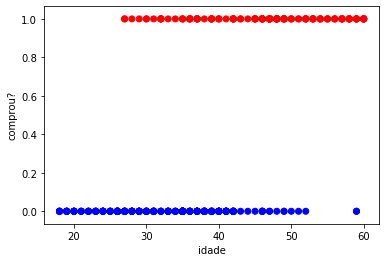

In [19]:
plt.scatter(x, y, c=y, cmap='bwr')
plt.xlabel('idade')
plt.ylabel('comprou?')

In [20]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 0.9999999999999996


Vamos utilizar o _sklearn_ como gabarito para nossa implementação. Entretanto, como a Regressão Logística do _sklearn_ faz uma __regularização L2__ automaticamente, temos de definir $C=10^{15}$ para "anular" a regularização. O parâmetro $C$ define a inversa da força da regularização (ver [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)). __Logo, quanto menor for o $C$, maior será a regularização e menores serão os valores dos pesos e bias.__

In [21]:
clf_sk = LogisticRegression(C=1e15)
clf_sk.fit(x, y.ravel())

print(clf_sk.coef_, clf_sk.intercept_)
print(clf_sk.score(x, y))

[[3.96794251]] [-0.67510634]
0.84


Text(0, 0.5, 'comprou?')

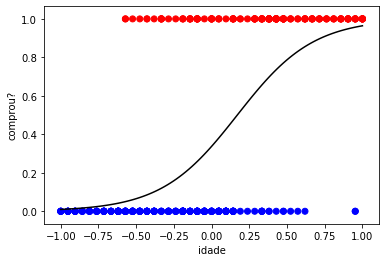

In [22]:
x_test = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
y_sk = clf_sk.predict_proba(x_test)

plt.scatter(x, y, c=y, cmap='bwr')
plt.plot(x_test, y_sk[:,1], color='black')
plt.xlabel('idade')
plt.ylabel('comprou?')

In [27]:
sigmoid = lambda x: 1.0 / (1.0 + np.exp(-x))
# def sigmoid(x):
#     return 1.0 / (1.0 + np.exp(-x))


## Numpy 

In [28]:
learning_rate = 0.001
n_epochs = 1001

# x # [n_samples x n_features]
n_samples = x.shape[0]
n_features = x.shape[1]

# np.random.random?
weights = 2*np.random.random(size=(1, n_features)) - 1  # [1 x n_features] # [-1,1)
bias = 2*np.random.random() - 1                          # [1 x 1]          # [-1,1)

for epoch in range(n_epochs):
    z = np.dot(x, weights.T) + bias
    # [n_samples x 1] = [n_samples x n_features]·[1 x n_features]^T + [1 x 1]
    
    y_pred = sigmoid(z)               # [n_samples x 1]
    # y                               # [n_samples x 1]
    error = y - y_pred                # [n_samples x 1]
    
    # offline: update all at once
    weights += learning_rate * np.dot(error.T, x)
    # [1 x n_features] = [n_samples x 1]^T·[n_samples x n_features]
    bias += learning_rate * error.sum()  # [1 x 1] = sum([n_samples x 1])
    
#     print(f"epoch: {epoch}, weights: {weights}, bias: {bias}")
    
    if epoch % 100 == 0:
        cost = -np.mean( y*np.log(y_pred) + (1-y)*np.log(1-y_pred) )
        print(f"epoch: {epoch}, cost: {cost}")
    
print("weights:", weights)
print("bias:", bias)

epoch: 0, cost: 0.5633873372674885
epoch: 100, cost: 0.4325988152823102
epoch: 200, cost: 0.42282497005402175
epoch: 300, cost: 0.4209460803919971
epoch: 400, cost: 0.42049313153263346
epoch: 500, cost: 0.4203731203596713
epoch: 600, cost: 0.42033985648633476
epoch: 700, cost: 0.42033042353999384
epoch: 800, cost: 0.4203277164483737
epoch: 900, cost: 0.42032693463121235
epoch: 1000, cost: 0.42032670807535794
weights: [[3.96450145]]
bias: -0.6748624472754456


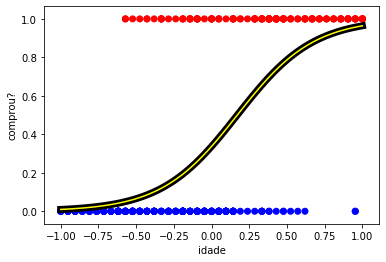

In [31]:
x_test = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
y_sk = clf_sk.predict_proba(x_test)
y_pred = sigmoid(np.dot(x_test, weights.T) + bias)

plt.scatter(x, y, c=y, cmap='bwr')
plt.plot(x_test, y_sk[:,1], color='black', linewidth=7.0)
plt.plot(x_test, y_pred, color='yellow')
plt.xlabel('idade')
plt.ylabel('comprou?')
plt.show()

In [33]:
print('Acurácia pelo Scikit-learn: {:.2f}%'.format(clf_sk.score(x, y)*100))

y_pred = np.round(sigmoid(np.dot(x, weights.T) + bias))
print('Acurária pela nossa implementação: {:.2f}%'.format(accuracy_score(y, y_pred)*100))

Acurácia pelo Scikit-learn: 84.00%
Acurária pela nossa implementação: 84.00%


# Exercícios

In [45]:
x, y = df[['idade', 'salario']].values, df.comprou.values.reshape(-1,1)

print(x.shape, y.shape)

(400, 2) (400, 1)


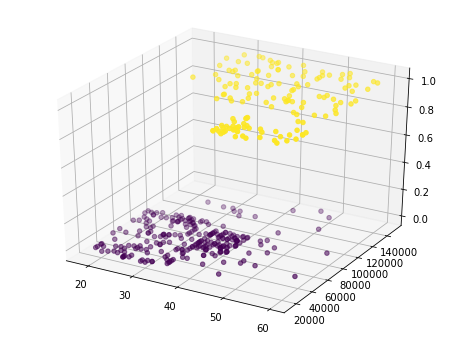

In [46]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x[:,0], x[:,1], y, c=y.ravel())
plt.show()

In [47]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 1.0


In [48]:
clf_sk = LogisticRegression(C=1e15)
clf_sk.fit(x, y.ravel())

print(clf_sk.coef_, clf_sk.intercept_)
print(clf_sk.score(x, y))

[[4.90326048 2.42329814]] [-0.36607923]
0.845


## Numpy

In [61]:
learning_rate = 1e-2 # <- tente estimar a learning rate
n_epochs = 1001

D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1xD]
b = 2*np.random.random()-1       # [1x1]

for step in range(n_epochs):
    # calcule a saida do neuronio sigmoid
    z = np.dot(x, w.T) + b  # [samples x 1] = [samples x D]·[1 x D]^T
    y_pred = sigmoid(z)
    error = y - y_pred     # [samples x 1]
    w += learning_rate*np.dot(error.T, x)
    b += learning_rate*error.sum()
    
    if step%100 == 0:
        # implemente a entropia cruzada (1 linha)
        cost = -np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 0.8788847626812918
step 100: 0.34635671214148644
step 200: 0.34631434083655976
step 300: 0.3463142283061821
step 400: 0.34631422799024636
step 500: 0.3463142279893569
step 600: 0.34631422798935424
step 700: 0.3463142279893543
step 800: 0.34631422798935424
step 900: 0.34631422798935424
step 1000: 0.3463142279893543
w:  [[4.90327828 2.42331333]]
b:  -0.36607244733065275


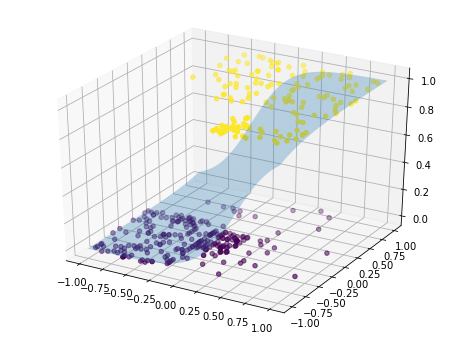

In [62]:
x1 = np.linspace(x[:, 0].min(), x[:, 0].max())
x2 = np.linspace(x[:, 1].min(), x[:, 1].max())
x1_mesh, x2_mesh = np.meshgrid(x1, x2)
x1_mesh = x1_mesh.reshape(-1, 1)
x2_mesh = x2_mesh.reshape(-1, 1)

x_mesh = np.hstack((x1_mesh, x2_mesh))
y_pred = sigmoid(np.dot(x_mesh, w.T) + b)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x[:,0], x[:,1], y, c=y.ravel())
ax.plot_trisurf(x1_mesh.ravel(), x2_mesh.ravel(), y_pred.ravel(), alpha=0.3, shade=False)
plt.show()

In [63]:
print('Acurácia pelo Scikit-learn: {:.2f}%'.format(clf_sk.score(x, y)*100))

y_pred = np.round(sigmoid(np.dot(x, w.T) + b))
print('Acurária pela nossa implementação: {:.2f}%'.format(accuracy_score(y, y_pred)*100))

Acurácia pelo Scikit-learn: 84.50%
Acurária pela nossa implementação: 84.50%


# Referências

1. [Logistic Regression from Scratch in Python](https://beckernick.github.io/logistic-regression-from-scratch/)
2. [Derivative of cost function for logistic Regression](https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression)